In [1]:
from tensorflow.keras.applications import vgg16
import pandas as pd
import numpy as np
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt

In [2]:
pretrained_model = vgg16.VGG16(weights="imagenet")

In [3]:
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
path = r"C:\Users\ADMIN\OneDrive\Desktop\jay\all assignments and files\all unzipped files\vgg16\imagenet_class_index.json"
classes = pd.read_json(path)
classes = classes.T[[1]]
classes_dict = classes.to_dict()[1]

classes.columns = ["name"]

In [6]:
def prepare_data(input_path = None):
    img_1 = load_img(input_path,target_size=(224,224))
    img_1 = np.array(img_1)
    plt.imshow(img_1)
    img_1 = vgg16.preprocess_input(img_1)
    img_1 = img_1.reshape(-1, 224, 224, 3)
    return img_1

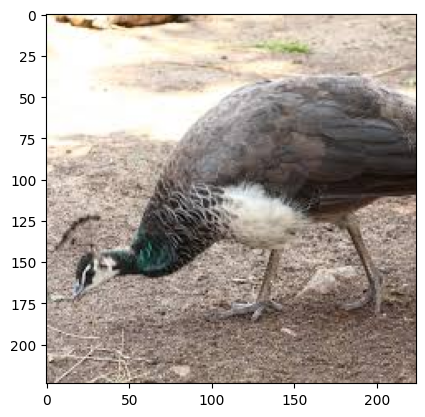

In [7]:
image_path = r"C:\Users\ADMIN\.jupyter\peacockimage.jpg"
image = prepare_data(image_path)

In [8]:
preds = pretrained_model.predict(image)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,name,preds
84,peacock,0.8678
138,bustard,0.0580
9,ostrich,0.0177
23,vulture,0.0107
18,magpie,0.0106
...,...,...
995,earthstar,0.0000
996,hen-of-the-woods,0.0000
997,bolete,0.0000
998,ear,0.0000


In [9]:
preds[0].shape

(1000,)

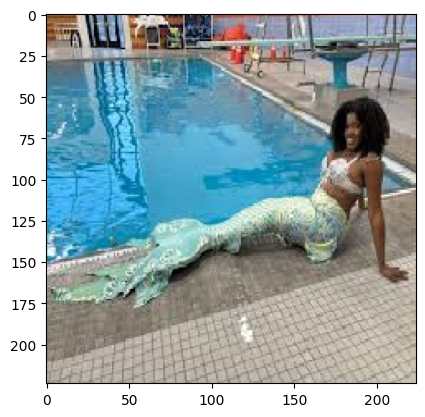

In [10]:
image_path_1 = r"C:\Users\ADMIN\.jupyter\vgg16_image.jpg"
image2 = prepare_data(image_path_1)

In [11]:
preds = pretrained_model.predict(image2)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


,name,preds
562,fountain,0.1285
39,common_iguana,0.0847
50,American_alligator,0.0466
842,swimming_trunks,0.0425
33,loggerhead,0.0406
...,...,...
953,pineapple,0.0000
940,spaghetti_squash,0.0000
941,acorn_squash,0.0000
69,trilobite,0.0000


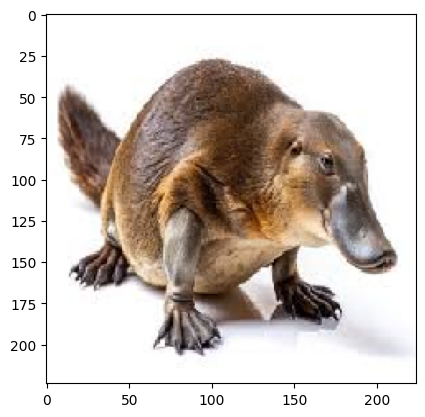

In [12]:
image_path_3 = r"C:\Users\ADMIN\.jupyter\images.jpg"
image3 = prepare_data(image_path_3)

In [13]:
preds = pretrained_model.predict(image3)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


,name,preds
103,platypus,0.9944
337,beaver,0.0041
360,otter,0.0006
104,wallaby,0.0001
350,ibex,0.0001
...,...,...
995,earthstar,0.0000
996,hen-of-the-woods,0.0000
997,bolete,0.0000
998,ear,0.0000


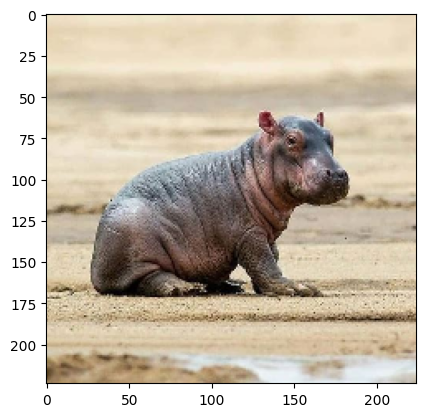

In [15]:
image_path_4 = r"C:\Users\ADMIN\OneDrive\Desktop\jay\hippo.jpeg"
image4 = prepare_data(image_path_4)

In [16]:
preds = pretrained_model.predict(image4)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


,name,preds
344,hippopotamus,1.0
975,lakeside,0.0
967,espresso,0.0
15,robin,0.0
999,toilet_tissue,0.0
...,...,...
995,earthstar,0.0
996,hen-of-the-woods,0.0
997,bolete,0.0
998,ear,0.0


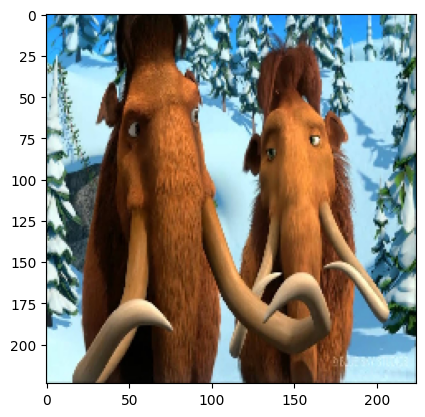

In [17]:
image_path_5 = r"C:\Users\ADMIN\OneDrive\Desktop\jay\ice age.jpg"
image5 = prepare_data(image_path_5)

In [18]:
preds = pretrained_model.predict(image5)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


,name,preds
365,orangutan,0.7157
594,harp,0.0660
494,chime,0.0339
488,chain,0.0335
558,flute,0.0332
...,...,...
995,earthstar,0.0000
996,hen-of-the-woods,0.0000
997,bolete,0.0000
56,king_snake,0.0000


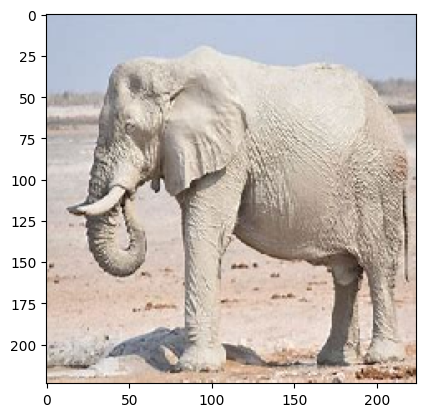

In [19]:
image_path_6 = r"C:\Users\ADMIN\OneDrive\Desktop\jay\white elephant.jpeg"
image6 = prepare_data(image_path_6)

In [20]:
preds = pretrained_model.predict(image6)
classes.loc[:, "preds"] = np.round(preds[0], 4)
classes.sort_values(by="preds", ascending=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


,name,preds
386,African_elephant,0.5468
101,tusker,0.2878
385,Indian_elephant,0.1651
51,triceratops,0.0003
975,lakeside,0.0000
...,...,...
995,earthstar,0.0000
996,hen-of-the-woods,0.0000
997,bolete,0.0000
998,ear,0.0000
